In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_dir="/kaggle/input/corona1/Dataset_2/train/"
test_dir="/kaggle/input/corona1/Dataset_2/test/"

train_norm_dir=train_dir+"Normal/"
test_norm_dir=test_dir+"Normal/"

train_covid19_dir=train_dir+"Covid_19/"
test_covid19_dir=test_dir+"Covid_19/"

train_pneumonia_dir=train_dir+"Pneumonia/"
test_pneumonia_dir=test_dir+"Pneumonia/"

In [3]:
train_dir="/kaggle/input/corona1/Dataset_2/train/"
test_dir="/kaggle/input/corona1/Dataset_2/test/"

train_norm_dir=train_dir+"Normal/"
test_norm_dir=test_dir+"Normal/"

train_covid19_dir=train_dir+"Covid_19/"
test_covid19_dir=test_dir+"Covid_19/"

train_pneumonia_dir=train_dir+"Pneumonia/"
test_pneumonia_dir=test_dir+"Pneumonia/"

In [4]:
from tensorflow.keras.models import Model
VGG19_MODEL=tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
for layer in VGG19_MODEL.layers:
    layer.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(3,activation='softmax')
model = tf.keras.Sequential([VGG19_MODEL,global_average_layer,prediction_layer])
model.compile(optimizer=tf.optimizers.Adam(), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"])

80142336/80134624 [==============================] - 0s 0us/step


In [5]:
train_datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
               train_dir,target_size=(224,224),class_mode="categorical")

validation_datagen=ImageDataGenerator(rescale=1/255)

validation_generator=validation_datagen.flow_from_directory(
               test_dir,target_size=(224,224),class_mode="categorical")

Found 720 images belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [6]:
history=model.fit_generator(train_generator,epochs=50,verbose=1,validation_data=validation_generator) 

Epoch 1/50
23/23 [==============================] - 32s 1s/step - loss: 1.1099 - accuracy: 0.3556 - val_loss: 1.0305 - val_accuracy: 0.6209
Epoch 2/50
23/23 [==============================] - 28s 1s/step - loss: 1.0140 - accuracy: 0.6750 - val_loss: 0.9731 - val_accuracy: 0.6503
Epoch 3/50
23/23 [==============================] - 29s 1s/step - loss: 0.9555 - accuracy: 0.7306 - val_loss: 0.9350 - val_accuracy: 0.6078
Epoch 4/50
23/23 [==============================] - 28s 1s/step - loss: 0.9019 - accuracy: 0.7250 - val_loss: 0.8860 - val_accuracy: 0.6732
Epoch 5/50
23/23 [==============================] - 28s 1s/step - loss: 0.8692 - accuracy: 0.7653 - val_loss: 0.8521 - val_accuracy: 0.7059
Epoch 6/50
23/23 [==============================] - 27s 1s/step - loss: 0.8260 - accuracy: 0.7514 - val_loss: 0.8531 - val_accuracy: 0.6438
Epoch 7/50
23/23 [==============================] - 28s 1s/step - loss: 0.8049 - accuracy: 0.7861 - val_loss: 0.8114 - val_accuracy: 0.7026
Epoch 8/50
23/23 [==

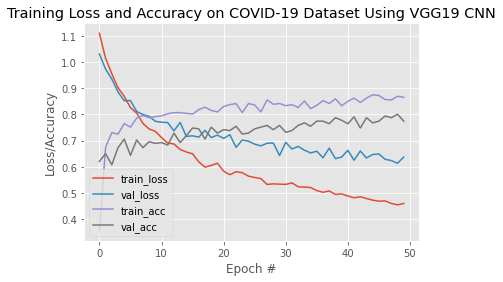

In [7]:
import matplotlib.pyplot as plt
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset Using VGG19 CNN")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [8]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Covid_19', 'Normal', 'Pneumonia']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[22 50 30]
 [21 49 32]
 [29 53 20]]
Classification Report
              precision    recall  f1-score   support

    Covid_19       0.31      0.22      0.25       102
      Normal       0.32      0.48      0.39       102
   Pneumonia       0.24      0.20      0.22       102

    accuracy                           0.30       306
   macro avg       0.29      0.30      0.29       306
weighted avg       0.29      0.30      0.29       306

